In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [68]:
list_path_models = ['/neurospin/dico/data/deep_folding/current/models/Champollion_V0/CINGULATE_left/2024-07-16/16-58-04_1/ukb_random_epoch80_embeddings',
'/neurospin/dico/data/deep_folding/current/models/Champollion_V0/CINGULATE_right//09-52-22_75/ukb_random_epoch80_embeddings',
'/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_2/ukb_random_epoch120_embeddings',
'/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_left/14-56-46_3/ukb_random_epoch110_embeddings',
'/neurospin/dico/data/deep_folding/current/models/Champollion_V0/STs_left/11-43-38_0/ukb_random_embeddings',
'/neurospin/dico/data/deep_folding/current/models/Champollion_V0/ORBITAL_left/20-56-02_1/ukb_random_embeddings',
'/neurospin/dico/data/deep_folding/current/models/Champollion_V0/ORBITAL_right/15-53-41_191/ukb_random_epoch80_embeddings',
'/neurospin/dico/jlaval/Output/FIP_BEST/18-19-19_0/ukb_right_random_embeddings',
'/neurospin/dico/jlaval/Output/FIP_BEST/18-19-19_0/ukb_left_random_embeddings']

initial_path = list_path_models[5]

embeddings_UKB = pd.read_csv(f'{initial_path}/full_embeddings.csv', index_col=0)
ebd_coor = embeddings_UKB.corr()

<AxesSubplot:>

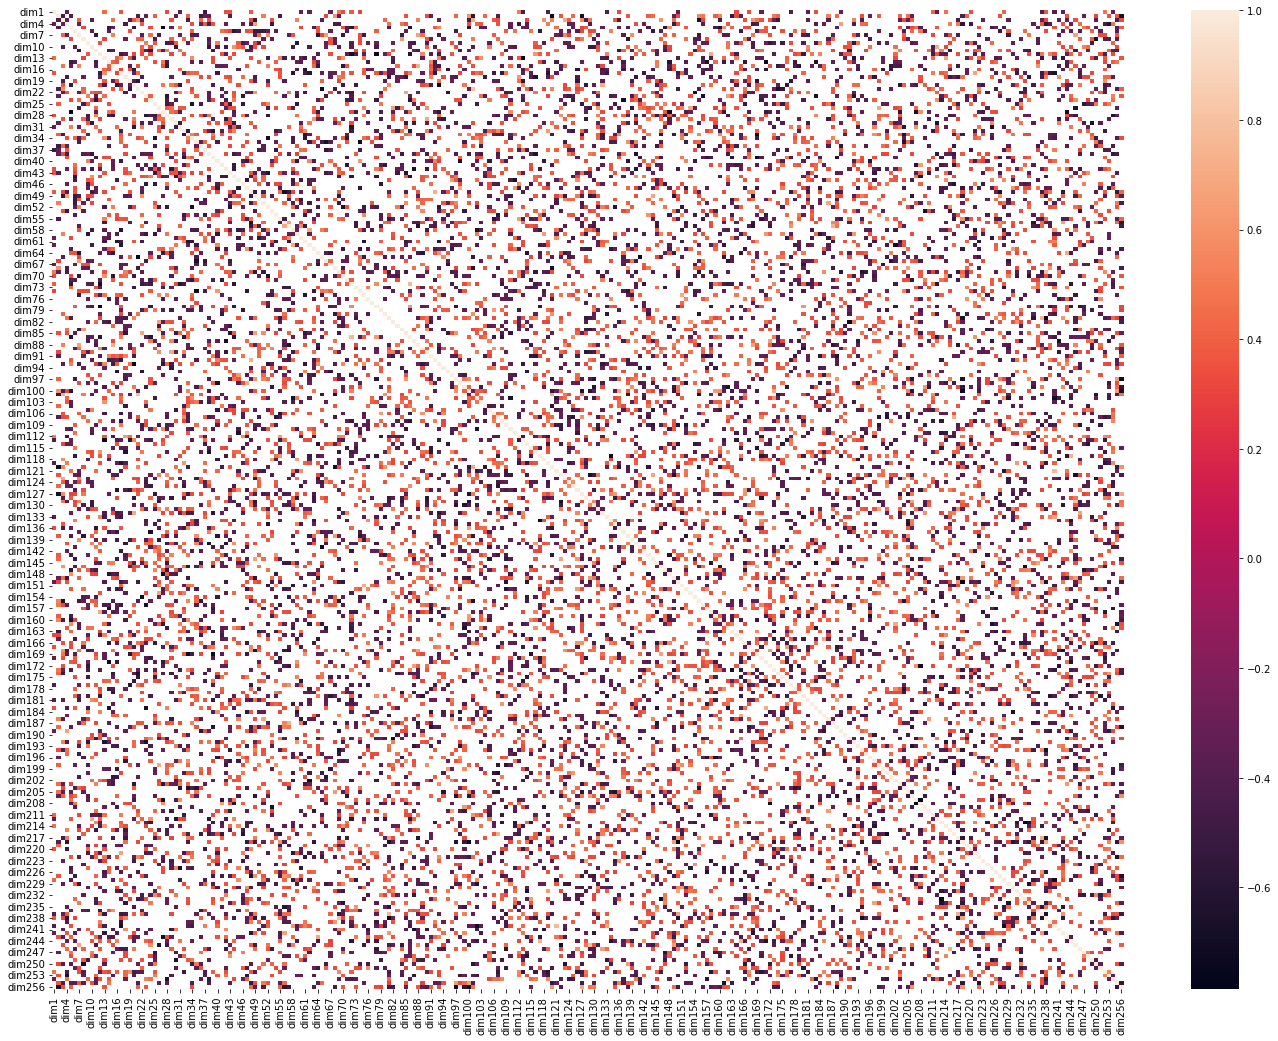

In [71]:
plt.figure(figsize=(24,18))
sns.heatmap(ebd_coor[abs(ebd_coor)>0.3])

In [189]:
for path in list_path_models:
    embeddings_UKB = pd.read_csv(f'{path}/full_embeddings.csv', index_col=0)

    #print(embeddings_UKB.describe())

    #print(embeddings_UKB.std(axis=0).min())

    #print(embeddings_UKB.std(axis=0).max())

    n_components=256

    pca = PCA(n_components=n_components)
    pca.fit(embeddings_UKB)
    #print(pca.explained_variance_ratio_)

    print(f'Pour expliquer 99,999% de la variance du latent {path} il faut les {(np.cumsum(pca.explained_variance_ratio_) < 0.99999).sum()+1} premières composantes principales.')

Pour expliquer 99,999% de la variance du latent /neurospin/dico/data/deep_folding/current/models/Champollion_V0/CINGULATE_left/2024-07-16/16-58-04_1/ukb_random_epoch80_embeddings il faut les 181 premières composantes principales.
Pour expliquer 99,999% de la variance du latent /neurospin/dico/data/deep_folding/current/models/Champollion_V0/CINGULATE_right//09-52-22_75/ukb_random_epoch80_embeddings il faut les 178 premières composantes principales.
Pour expliquer 99,999% de la variance du latent /neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_2/ukb_random_epoch120_embeddings il faut les 169 premières composantes principales.
Pour expliquer 99,999% de la variance du latent /neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_left/14-56-46_3/ukb_random_epoch110_embeddings il faut les 157 premières composantes principales.
Pour expliquer 99,999% de la variance du latent /neurospin/dico/data/deep_folding/current/models/Champollion_V0/STs_lef

In [42]:
embeddings_UKB.std(axis=0).min()

5.660362804071134

In [43]:
embeddings_UKB.std(axis=0).max()

17.963783682439356

In [44]:
#scaler = StandardScaler()
#scaler.fit(embeddings_UKB)
#scl_bdd_ukb = scaler.transform(embeddings_UKB)
#scl_bdd_ukb.shape

In [48]:
n_components=20

pca = PCA(n_components=n_components)
pca.fit(embeddings_UKB)
print(pca.explained_variance_ratio_)

[0.10882965 0.08573316 0.08124852 0.07350935 0.07281143 0.06661824
 0.06532653 0.06223697 0.05591526 0.05524517 0.0520388  0.04954701
 0.04779684 0.04388057 0.03688763 0.01754231 0.00875257 0.00433229
 0.00333463 0.00177818]


In [49]:
(np.cumsum(pca.explained_variance_ratio_) < 0.99).sum()+1

19

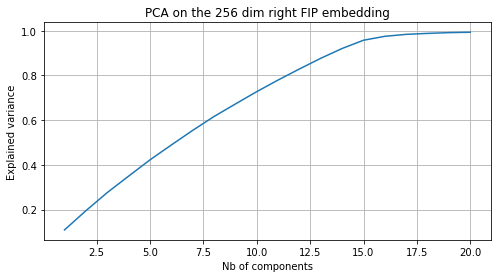

In [50]:
plt.figure(figsize=(8,4))
plt.plot(range(1,n_components+1,1), np.cumsum(pca.explained_variance_ratio_))
plt.grid(visible=True)
plt.xlabel('Nb of components')
plt.ylabel('Explained variance')
plt.title('PCA on the 256 dim right FIP embedding')
plt.show()

In [51]:
pca.components_.shape

(20, 256)

In [52]:
def project(direction, latent):
    '''
    This function projects each row of the input dataframe onto a given direction vector.

    Parameters:
    direction (array-like): The direction vector onto which to project the rows of the dataframe.
    latent (DataFrame): The dataframe containing the data to be projected.

    Returns:
    sorted_projections (Series): A sorted pandas Series containing the projection values for each row in descending order.
    '''
    # Compute the dot product of each row in embeddings with heriditary_direction
    # This calculates np.dot(a, heriditary_vector) for each row `a` in `embeddings`.
    dot_products = latent.apply(lambda row: np.dot(row, direction), axis=1)

    # Compute the norm squared of heriditary_vector,
    direction = np.dot(direction, direction)

    # Calculate the projections
    projections = dot_products / direction

    # Sort the series by the projection values
    sorted_projections = projections.sort_values(ascending=False)

    # Display the sorted series
    #print(sorted_projections)
    return sorted_projections

def plot_figure(sorted_projections,embeddings, nb_rd, component_nb):
    '''
    This function visualizes the distribution of projected subjects along a given direction, 
    and compares it with random directions.

    Parameters:
    sorted_projections (Series): The sorted projections of subjects onto a specific direction.
    embeddings (DataFrame): The original dataframe containing the subject data.
    nb_rd (int): The number of random directions to be compared with.
    component_nb (str): The component_n for the direction.

    Visualization:
    The function creates two subplots:
    1. A histogram showing the distribution of projections for the specified direction and random directions.
    2. A scatter plot comparing the standard deviations of projections for different directions.
    '''

    list_std=[]
    list_direction_name=[]

    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    sorted_projections.hist(bins=100, alpha=0.8, label=f'SNPs direction', color='salmon')
    list_std.append(sorted_projections.std())
    list_direction_name.append('SNP')

    for i in range(nb_rd):
        random_direction = np.random.randn(256) # to test a random direction
        sorted_rd_projections = project(random_direction, embeddings)
        sorted_rd_projections.hist(bins=100, alpha=0.1, color='mediumslateblue') # , label=f'Random direction {i}')
        list_std.append(sorted_rd_projections.std())
        list_direction_name.append(f'Random {i}')
        

    plt.ylabel('Nb of subject')
    plt.xlabel(f'Projected position on the direction determined by component {component_nb}')
    plt.title('Distribution of projected subject on a given direction')
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(list_std[0], list_direction_name[0], color='salmon')
    plt.scatter(list_std[1:],list_direction_name[1:], color='mediumslateblue')
    plt.xlabel('STD')
    plt.yticks([i for i in range(0,len(list_direction_name),len(list_direction_name)//10)])
    plt.ylabel('Direction')
    plt.show()

In [53]:
#sorted_projections = project(pca.components_[0], embeddings_UKB)

#plot_figure(sorted_projections,embeddings_UKB, 100, 0)

In [35]:
#sorted_projections = project(pca.components_[19], embeddings_UKB)

#plot_figure(sorted_projections,embeddings_UKB, 100, 19)

In [55]:
pca_embeddings_UKB = pd.DataFrame(pca.transform(embeddings_UKB), columns=[f'pc{i}' for i in range(n_components)],  index=embeddings_UKB.index)
pca_embeddings_UKB.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19
ID,,,,,,,,,,,,,,,,,,,,
sub-1000021,95.980255,58.744232,-168.312853,-17.308820,-1.246996,29.591497,-61.288569,-26.975546,-62.793814,-41.860045,-33.351645,-10.225584,-35.171439,4.564431,39.191633,-9.370939,33.118004,3.054287,-2.848222,-7.475018
sub-1000458,-2.018557,-71.891448,-83.088524,-12.833341,-2.114015,14.742275,-31.275723,-37.920270,40.926448,-63.167058,10.795016,-35.522390,-62.538616,-33.644787,72.757413,-21.198112,-9.141938,-8.306884,10.942503,-5.814848
sub-1000575,-93.508805,-19.990979,-1.384663,-6.698326,-13.169418,-38.973982,-58.228303,-9.872599,-18.194896,-79.765140,23.751881,66.951157,74.929748,34.243851,-25.506381,54.620962,-15.244156,23.520533,7.327115,6.331344
sub-1000606,38.511932,-34.462220,26.706363,132.756878,5.904859,-46.629882,76.030452,-65.962504,120.106625,43.854501,-52.718073,53.309350,34.747096,8.038544,5.221144,6.894491,-9.406200,8.226502,-6.519529,-4.023352
sub-1000963,96.124529,-58.155719,-61.970955,85.304812,-58.985849,-90.501022,-39.844349,-75.559840,0.142136,-1.006127,13.015087,-52.088892,-47.386120,59.536452,-39.932276,-17.678492,-4.468353,7.869747,-12.733383,5.717681


<AxesSubplot:>

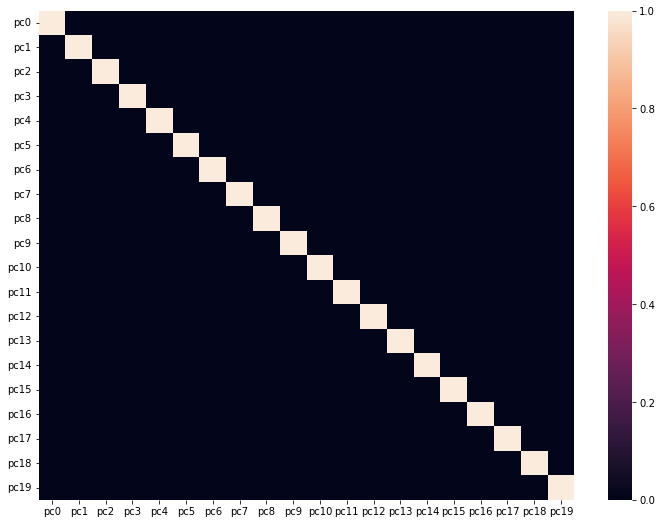

In [74]:
plt.figure(figsize=(12,9))
sns.heatmap(pca_embeddings_UKB.corr())

In [37]:
#pca_embeddings_UKB.to_csv('/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_2/ukb_random_epoch120_embeddings/pca_embeddings.csv')
#pca_embeddings_UKB.to_csv('/neurospin/dico/data/deep_folding/current/models/Champollion_V0/STs_left/11-43-38_0/ukb_random_embeddings/pca_embeddings.csv')
#pca_embeddings_UKB.to_csv('/neurospin/dico/data/deep_folding/current/models/Champollion_V0/ORBITAL_left/20-56-02_1/ukb_random_embeddings/pca_embeddings.csv')
path_to_save=f'{initial_path}/pca{n_components}_embeddings.csv'
pca_embeddings_UKB.to_csv(path_to_save)

In [38]:
path_to_save

'/neurospin/dico/data/deep_folding/current/models/Champollion_V0/CINGULATE_left/2024-07-16/16-58-04_1/ukb_random_epoch80_embeddings/pca256_embeddings.csv'